In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def showGraph(data):
    plt.plot(data)
    plt.show()
# convert dataset to x and y
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
def relative_error(xs, ys):
    error = 0
    zero = 0
    for i in range(len(xs)):
        if ys[i] != 0:
            error += abs(xs[i]-ys[i])*100 / ys[i]
        else:
            zero += 1
    error /= (len(xs) - zero)
    return error

In [3]:
# load the dataset
dataframe = pandas.read_csv('data_stock_market.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')



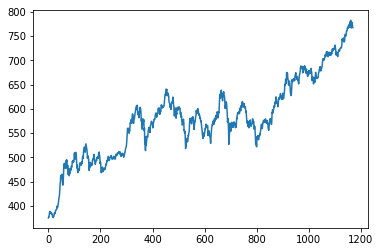

In [4]:
showGraph(dataset)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

783 387


In [6]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [8]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
3s - loss: 0.0387
Epoch 2/100
2s - loss: 0.0088
Epoch 3/100
1s - loss: 0.0033
Epoch 4/100
2s - loss: 6.3725e-04
Epoch 5/100
2s - loss: 2.6622e-04
Epoch 6/100
2s - loss: 2.5708e-04
Epoch 7/100
2s - loss: 2.5358e-04
Epoch 8/100
1s - loss: 2.5952e-04
Epoch 9/100
1s - loss: 2.4635e-04
Epoch 10/100
2s - loss: 2.4054e-04
Epoch 11/100
2s - loss: 2.3252e-04
Epoch 12/100
2s - loss: 2.2356e-04
Epoch 13/100
2s - loss: 2.3190e-04
Epoch 14/100
2s - loss: 2.2532e-04
Epoch 15/100
1s - loss: 2.2205e-04
Epoch 16/100
2s - loss: 2.3234e-04
Epoch 17/100
1s - loss: 2.2667e-04
Epoch 18/100
2s - loss: 2.2741e-04
Epoch 19/100
2s - loss: 2.2414e-04
Epoch 20/100
2s - loss: 2.2369e-04
Epoch 21/100
2s - loss: 2.2527e-04
Epoch 22/100
2s - loss: 2.2368e-04
Epoch 23/100
2s - loss: 2.2328e-04
Epoch 24/100
2s - loss: 2.2236e-04
Epoch 25/100
2s - loss: 2.1539e-04
Epoch 26/100
2s - loss: 2.2609e-04
Epoch 27/100
2s - loss: 2.2496e-04
Epoch 28/100
2s - loss: 2.1952e-04
Epoch 29/100
2s - loss: 2.2433e-04
Epoch 

In [9]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredictT = scaler.inverse_transform(trainPredict)
trainYT = scaler.inverse_transform([trainY])
testPredictT = scaler.inverse_transform(testPredict)
testYT = scaler.inverse_transform([testY])
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
trainScore = relative_error(trainYT[0], trainPredictT[:,0])
print('Train Score: %.2f ' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
testScore = relative_error(testYT[0], testPredictT[:,0])
print('Test Score: %.2f ' % (testScore))

Train Score: 0.93 
Test Score: 1.67 


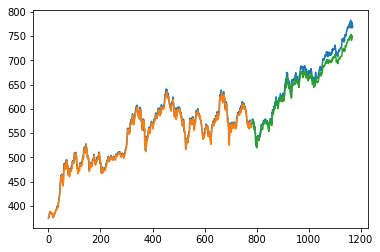

In [10]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredictT)+look_back, :] = trainPredictT
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredictT)+(look_back*2)+1:len(dataset)-1, :] = testPredictT
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()